The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this assignment are as follows:
1.  Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
2. Data fetching and understand the train/val/test splits.
3. Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)
4. Print the classification metric report (2.5 points)
5. Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points) 
6. Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points) 
7. Implement batch normalization for training the neural network (2.5 points)

#### Loard Tensorflow

In [0]:
# Load tensorflow

import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

In [0]:
from google.colab import drive
import h5py
import numpy as np

#### Load dataset from the gdrive

In [3]:
# Mount the google drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!ls "/content/gdrive/My Drive/Colab Notebooks/Project 2"

'Introduction to Neural Networks and Deep Learning_R7_Project2.ipynb'
 NN_Project2_Brief.pdf
 SVHN_single_grey1.h5


In [0]:
# Load the dataset
dataset = h5py.File('/content/gdrive/My Drive/Colab Notebooks/Project 2/SVHN_single_grey1.h5','r')

In [6]:
for key in dataset.keys():
  print(key)

X_test
X_train
X_val
y_test
y_train
y_val


In [0]:
# Load the training, test and validation set
X_train = dataset['X_train'][:]
y_train = dataset['y_train'][:]
X_test = dataset['X_test'][:]
y_test = dataset['y_test'][:]
X_val = dataset['X_val'][:]
y_val = dataset['y_val'][:]

### 1.  Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

In [8]:
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


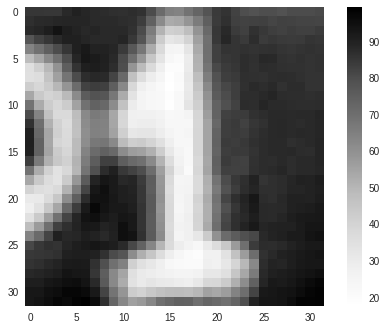

In [9]:
import matplotlib.pylab as plt

plt.figure()
plt.imshow(X_train[99])
plt.colorbar()
plt.grid(False)
plt.show()

### 2. Data fetching and understand the train/val/test splits.

In [10]:
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


In [11]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_train.shape

(42000, 10)

In [12]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_test.shape

(18000, 10)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
# flatten out all images to be one-dimensional
X_train_1d = X_train.reshape(X_train.shape[0], 1024).astype('float32') 
X_test_1d = X_test.reshape(X_test.shape[0], 1024).astype('float32') 

In [15]:
X_train_1d.shape

(42000, 1024)

In [16]:
print('Train 1d shape: X_train_1d', X_train_1d.shape)
print('Test 1d shape: X_test_1d', X_test_1d.shape)

Train 1d shape: X_train_1d (42000, 1024)
Test 1d shape: X_test_1d (18000, 1024)


### 3. Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

### 4. Print the classification metric report (2.5 points)

### 5. Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

In [17]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

Using TensorFlow backend.


In [18]:
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000, 10)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000, 10)


In [0]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train.shape

(42000, 32, 32)

In [21]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

X_train shape (42000, 32, 32)
X_test shape (18000, 32, 32)


In [0]:
X_train = X_train.reshape(X_train.shape[0], 1024).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1024).astype('float32')

In [23]:
X_train.shape

(42000, 1024)

In [24]:
X_test.shape

(18000, 1024)

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

In [26]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
Total params: 233,300
Trainable params: 233,300
Non-trainable params: 0
_________________________________________________________________


### 6. Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

### 7. Implement batch normalization for training the neural network (2.5 points)

In [27]:
a = np.array([[1,2], [4,5]])

a.reshape(4)

array([1, 2, 4, 5])

In [28]:
b = np.array([[11,22], [44,55]])
b

array([[11, 22],
       [44, 55]])

In [29]:
c=np.array([])
c=np.append(a,b)
c

array([ 1,  2,  4,  5, 11, 22, 44, 55])